In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn import preprocessing  
from sklearn.tree import export_graphviz
from sklearn import datasets, utils, tree
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from IPython import display
from graphviz import Source
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import random
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [11]:
np.random.seed(32)
random.seed(2)

In [12]:
rain=pd.read_csv('weatherAUS.csv',parse_dates=['Date'])
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [13]:
#Finding total missing data and it's percent 
total = rain.isnull().sum().sort_values(ascending=False)
percent = (rain.isnull().sum()/rain.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


In [14]:
#Dropping Column with high NULL Values
rain = rain.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am',"RISK_MM"],axis=1)

#Dropping If any NA values are present, drop that row or column
rain = rain.dropna(how='any')
rain.shape

(112925, 19)

In [22]:
z = np.abs(stats.zscore(rain._get_numeric_data()))
print(z)
rain= rain[(z < 3).all(axis=1)]
print(rain.shape)

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]
(107868, 19)


In [23]:
rain['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


In [24]:
r=rain
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    
    print(np.unique(rain[col]))
# transform the categorical columns
r = pd.get_dummies(rain, columns=categorical_columns)
r.iloc[0:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,...,1,0,0,0,0,0,0,0,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,...,0,0,0,1,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
5,2008-12-06,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,1,0,0
6,2008-12-07,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,1,0,0,0
7,2008-12-08,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,1,0,0,0,0,0
8,2008-12-09,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
df=r.drop(columns=['Date','Location'],axis=1)
df.shape

(107868, 62)

In [29]:
#Scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

In [30]:
random.seed(32) 
df=df.sample(10000,random_state=99)

In [36]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
82840,0.498575,0.545455,0.0,0.506849,0.108108,0.309524,0.494382,0.214286,0.230216,0.184652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46645,0.358974,0.374332,0.0,0.506849,0.243243,0.738095,0.707865,0.500000,0.553957,0.477218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4895,0.245014,0.288770,0.0,0.136986,0.108108,0.000000,0.820225,0.469388,0.733813,0.693046,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34509,0.623932,0.457219,0.0,0.438356,0.243243,0.619048,0.460674,0.530612,0.611511,0.604317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6382,0.695157,0.727273,0.0,0.356164,0.135135,0.261905,0.325843,0.183673,0.558753,0.549161,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
x = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]

# Creating Training And Testing Split

In [43]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( 
                        x,y, 
                test_size = 0.30, random_state = 101)

In [48]:
x1t=X_train1.as_matrix()
x2t=X_test1.as_matrix()
y1t=y_train1.as_matrix()
y2t=y_test1.as_matrix()

In [66]:
X_train=(X_train1).T
X_test=(X_test1).T
y_train=(y1t).T
y_test=(y2t).T

# Sigmoid function

In [67]:
def sigmoid(z):
    s =1/(1+np.exp(-z))
    return s

# Plot Accuracy or Loss as a Function of Number of Epoch

In [68]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

# 1. Shallow Neural Network 

In [69]:
n_x = X_train.shape[0] # size of input layer
n_h = 4         # Only one Hidden Layer
n_y =  y_train.shape[0] # size of output layer
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 61
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


# Defining initialize_parameters functions

In [70]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(32)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 =  np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [73]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-3.48894451e-03  9.83703433e-03  5.80922831e-03  7.02844409e-04
   7.77532676e-03  5.81958745e-03  1.47179053e-02  1.66318101e-02
  -2.61177121e-03 -6.88676813e-03 -6.94923262e-03  1.94042346e-02
   1.80541519e-02  4.56313852e-03 -5.74812040e-03  1.14180503e-03
   1.51358077e-02  3.51131840e-03 -8.89332139e-04  9.16954228e-03
   5.05645125e-03 -8.15271110e-03  3.89150951e-03 -4.24962470e-03
   3.96231519e-04 -5.27963922e-03 -5.10303679e-03 -8.88285149e-03
   1.08762473e-02  6.73392264e-03 -1.06731704e-02  1.21804998e-02
   3.36371255e-02 -8.32253403e-03 -3.40348381e-03 -1.85857154e-02
   8.23065599e-06  3.51574483e-03  1.52150885e-02 -6.80474137e-03
   9.38057708e-03 -6.81414713e-03 -2.01098083e-03 -1.74886440e-04
  -1.78791213e-02 -8.51740228e-03 -1.62830331e-02  9.66997738e-03
   5.31155943e-04  2.89712932e-03  6.24443380e-04 -1.09812873e-02
   1.30533064e-03 -1.85337064e-03 -1.34073473e-02 -3.24019679e-03
   1.48436338e-02  1.31308828e-02 -6.32164014e-03 -3.91573298e-03
  -2.

# Defining forward_propagation function

In [74]:
def forward_propagation(X, parameters):
   
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [81]:
A2, cache = forward_propagation(X_train, parameters)

# Defining compute_cost function

In [82]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    cost = cost.astype(float)  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
 
    return cost

# Defining backward_propagation function

In [83]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
            
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
   
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = ((1 / m) * np.sum(dZ2, axis=1,keepdims=True))
    db2=db2.T
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "db2": db2,
             "dW2": dW2
             }
    
    return grads

In [84]:
grads = backward_propagation(parameters, cache, X_train, y_train)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 1.59379158e-03  1.56752160e-03  8.37327830e-07  1.28005975e-03
   1.03663265e-03  1.23257349e-03  1.78045902e-03  1.16246849e-03
   1.81492000e-03  1.78586142e-03  1.62427662e-03  1.63580817e-03
   1.10961322e-04  2.50951581e-04  2.32171459e-04  2.31306573e-04
   1.92453470e-04  1.91942131e-04  1.40067308e-04  1.10928371e-04
   1.15673519e-04  2.07788705e-04  2.85498086e-04  2.61217523e-04
   1.91942822e-04  2.44725906e-04  1.87308788e-04  1.51120457e-04
   2.17875311e-04  2.00602545e-04  2.05402065e-04  2.53225481e-04
   1.59290534e-04  2.15636990e-04  1.34578321e-04  1.36966371e-04
   1.18838136e-04  2.34525349e-04  2.77565680e-04  2.56608161e-04
   1.87933459e-04  2.64417984e-04  2.03024844e-04  1.53452204e-04
   2.10903886e-04  2.62844832e-04  2.29027606e-04  2.82202819e-04
   1.81655097e-04  1.71465749e-04  1.66824644e-04  1.36150126e-04
   1.54179485e-04  2.43166358e-04  2.85711742e-04  2.67524771e-04
   1.84722816e-04  1.90309522e-04  1.73872869e-04  1.36140598e-04
   1

# Defining update_parameters function

In [85]:
def update_parameters(parameters, grads, learning_rate=0.02):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [87]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-3.55269617e-03  9.77433347e-03  5.80919481e-03  6.51642019e-04
   7.73386146e-03  5.77028451e-03  1.46466869e-02  1.65853113e-02
  -2.68436801e-03 -6.95820259e-03 -7.01420369e-03  1.93388023e-02
   1.80497135e-02  4.55310046e-03 -5.75740726e-03  1.13255277e-03
   1.51281096e-02  3.50364072e-03 -8.94934832e-04  9.16510515e-03
   5.05182431e-03 -8.16102265e-03  3.88008959e-03 -4.26007340e-03
   3.88553807e-04 -5.28942826e-03 -5.11052914e-03 -8.88889631e-03
   1.08675323e-02  6.72589854e-03 -1.06813865e-02  1.21703708e-02
   3.36307539e-02 -8.33115951e-03 -3.40886694e-03 -1.85911941e-02
   3.47713054e-06  3.50636381e-03  1.52039858e-02 -6.81500570e-03
   9.37305974e-03 -6.82472384e-03 -2.01910182e-03 -1.81024528e-04
  -1.78875574e-02 -8.52791607e-03 -1.62921942e-02  9.65868927e-03
   5.23889739e-04  2.89027069e-03  6.17770394e-04 -1.09867333e-02
   1.29916346e-03 -1.86309729e-03 -1.34187758e-02 -3.25089778e-03
   1.48362449e-02  1.31232704e-02 -6.32859506e-03 -3.92117860e-03
  -2.

# Defining nn_model (Neural Network) Model

In [88]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
   
    
    np.random.seed(32)
    n_x = 61
    n_y = 1    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    costs=[0]* num_iterations
    for i in range(0, num_iterations):
         
       
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost for every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        costs[i]=cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')    
    return parameters

Cost after iteration 0: 0.693186
Cost after iteration 1000: 0.510084
Cost after iteration 2000: 0.481001
Cost after iteration 3000: 0.412210
Cost after iteration 4000: 0.378415
Cost after iteration 5000: 0.360981
Cost after iteration 6000: 0.353313
Cost after iteration 7000: 0.349581
Cost after iteration 8000: 0.347267
Cost after iteration 9000: 0.345578
Cost after iteration 10000: 0.344256
Cost after iteration 11000: 0.343189
Cost after iteration 12000: 0.342309
Cost after iteration 13000: 0.341558
Cost after iteration 14000: 0.340878


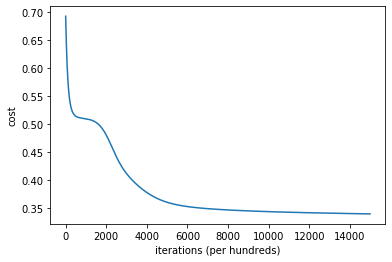

In [89]:
parameters = nn_model(X_train, y_train, 4, num_iterations=15000, print_cost=True)

In [90]:
def predict(parameters, X):
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
   
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)    
    return predictions

In [91]:
predictions = predict(parameters, X_train)
print ('Train Accuracy: %d' % float((np.dot(y_train,predictions.T) + np.dot(1-y_train,1-predictions.T))/float(y_train.size)*100) + '%')

Train Accuracy: 85%


In [92]:
predictions = predict(parameters, X_test)
print ('Test Accuracy: %d' % float((np.dot(y_test,predictions.T) + np.dot(1-y_test,1-predictions.T))/float(y_test.size)*100) + '%')

Test Accuracy: 85%


# keras

In [95]:
import keras
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [96]:
x1, x2, y1, y2 = train_test_split( 
                        x,y, 
                test_size = 0.30, random_state = 101)

In [97]:
print(x1.shape,x2.shape, y1.shape, y2.shape)

(7000, 61) (3000, 61) (7000, 1) (3000, 1)


# 2. Linear activation function

In [98]:
def mlp_model_l(x):
    model = Sequential()
    
    model.add(Dense(50,input_shape = (x, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))   
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [99]:
modell = mlp_model_l(61)
history = modell.fit(x1, y1, validation_split = 0.3, epochs = 25, verbose = 0)


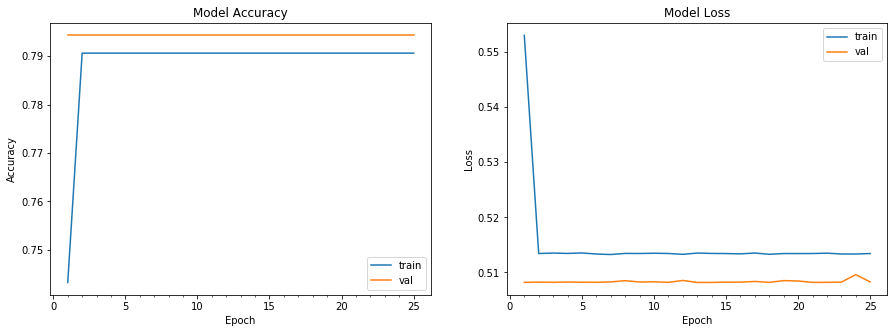

In [100]:
plot_model_history(history)

In [101]:
results_l1 = modell.evaluate(x1, y1)
print('Train accuracy: ', results_l1[1])
results_l2 = modell.evaluate(x2, y2)
print('Test accuracy: ', results_l2[1])

7000/7000 [==============================] - 0s 16us/step
Train accuracy:  0.7917143106460571
3000/3000 [==============================] - 0s 10us/step
Test accuracy:  0.7940000295639038


In [102]:
y_pred_l = modell.predict(x2)
y_pred_l = (y_pred_l > 0.5)
print(classification_report(y2, y_pred_l)) 
print("AUC",roc_auc_score(y2, y_pred_l))


              precision    recall  f1-score   support

         0.0       0.79      1.00      0.89      2382
         1.0       0.00      0.00      0.00       618

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000

AUC 0.5


# 3.  Non Linear Activation Function (Relu)

In [104]:
def mlp_model_nl(x):
    model = Sequential()
    
    model.add(Dense(50,input_shape = (x, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [105]:
modelnl = mlp_model_nl(61)
historynl = modelnl.fit(x1, y1, validation_split = 0.3, epochs = 100, verbose = 0)

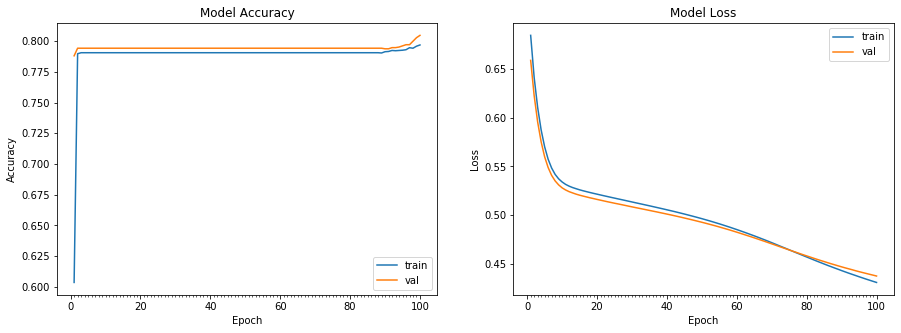

In [106]:
plot_model_history(historynl)

In [108]:
results_nl1 = modelnl.evaluate(x1, y1)
print('Train accuracy: ', results_nl1[1])
results_nl2 = modelnl.evaluate(x2, y2)
print('Test accuracy: ', results_nl2[1])

7000/7000 [==============================] - 0s 13us/step
Train accuracy:  0.7992857098579407
3000/3000 [==============================] - 0s 11us/step
Test accuracy:  0.8006666898727417


In [109]:
y_pred_nl = modelnl.predict(x2)
y_pred_nl = (y_pred_nl > 0.5)
print(classification_report(y2, y_pred_nl)) 
print("AUC",roc_auc_score(y2, y_pred_nl))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      2382
         1.0       0.67      0.06      0.12       618

    accuracy                           0.80      3000
   macro avg       0.74      0.53      0.50      3000
weighted avg       0.78      0.80      0.73      3000

AUC 0.5281643067341631


# 4. Selu Activation

In [110]:
def mlp_model_t(x):
    model = Sequential()
    
    model.add(Dense(50,input_shape = (x, )))
    model.add(Activation('selu'))    # use tanh
    model.add(Dense(50))
    model.add(Activation('selu'))    # use tanh
    model.add(Dense(50))
    model.add(Activation('selu'))    # use tanh
    model.add(Dense(50))
    model.add(Activation('selu'))    # use tanh
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [111]:
modelt = mlp_model_t(61)
historyt = modelt.fit(x1, y1, validation_split = 0.3, epochs = 100, verbose = 0)

In [112]:
results_t1 = modelt.evaluate(x1, y1)
print('Train accuracy: ', results_t1[1])
results_t2 = modelt.evaluate(x2, y2)
print('Test accuracy: ', results_t2[1])

7000/7000 [==============================] - 0s 36us/step
Train accuracy:  0.8531428575515747
3000/3000 [==============================] - 0s 39us/step
Test accuracy:  0.8486666679382324


In [113]:
y_pred_t = modelt.predict(x2)
y_pred_t = (y_pred_t > 0.5)
print(classification_report(y2, y_pred_t)) 
print("AUC",roc_auc_score(y2, y_pred_t))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2382
         1.0       0.70      0.46      0.56       618

    accuracy                           0.85      3000
   macro avg       0.79      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000

AUC 0.7063820074507023


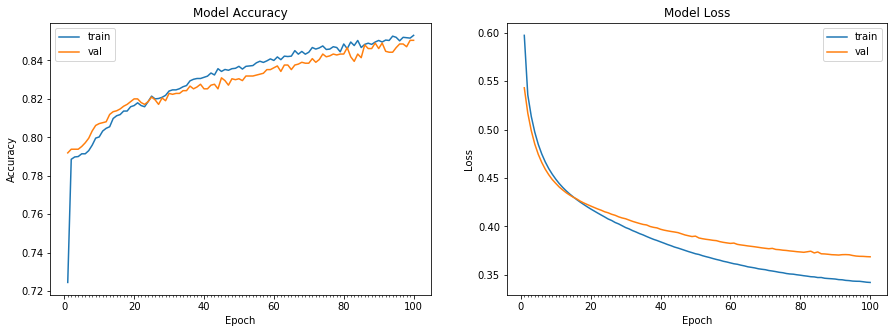

In [114]:
plot_model_history(historyt)

# 5. Batch Normalization

In [115]:
def mlp_model_b():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (61, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('selu'))    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model


In [116]:
modelb = mlp_model_b()
historyb = modelb.fit(x1, y1, validation_split = 0.3, epochs = 100, verbose = 0)

In [117]:
results_b1 = modelb.evaluate(x1, y1)
print('Train accuracy: ', results_b1[1])
results_b2 = modelb.evaluate(x2, y2)
print('Test accuracy: ', results_b2[1])

7000/7000 [==============================] - 0s 48us/step
Train accuracy:  0.8617143034934998
3000/3000 [==============================] - 0s 48us/step
Test accuracy:  0.8496666550636292


In [118]:
y_pred_b = modelb.predict(x2)
y_pred_b = (y_pred_b > 0.5)
print(classification_report(y2, y_pred_b)) 
print("AUC",roc_auc_score(y2, y_pred_b))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2382
         1.0       0.71      0.45      0.55       618

    accuracy                           0.85      3000
   macro avg       0.79      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000

AUC 0.7034168072844065


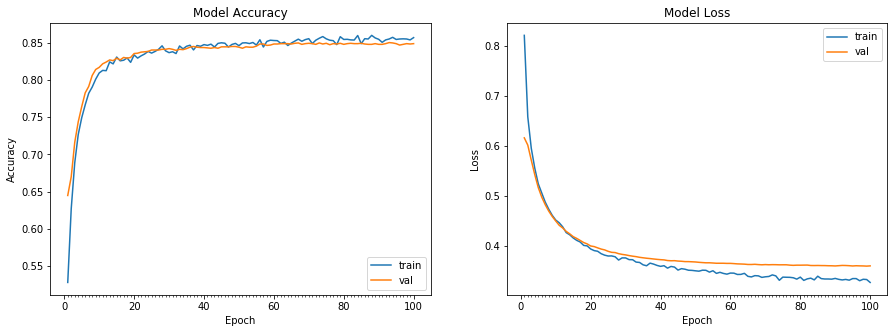

In [119]:
plot_model_history(historyb)

# 6. Adam Optimiser

In [120]:
def mlp_model_a():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (61, )))
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(Activation('selu'))  
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [121]:
modela = mlp_model_a()
historya = modela.fit(x1, y1, validation_split = 0.3, epochs = 100, verbose = 0)

In [122]:
results_a1 = modela.evaluate(x1, y1)
print('Train accuracy: ', results_a1[1])
results_a2 = modela.evaluate(x2, y2)
print('Test accuracy: ', results_a2[1])

7000/7000 [==============================] - 0s 34us/step
Train accuracy:  0.9178571701049805
3000/3000 [==============================] - 0s 37us/step
Test accuracy:  0.8066666722297668


In [123]:
y_pred_a = modela.predict(x2)
y_pred_a = (y_pred_a > 0.5)
print(classification_report(y2, y_pred_a)) 
print("AUC",roc_auc_score(y2, y_pred_a))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      2382
         1.0       0.53      0.55      0.54       618

    accuracy                           0.81      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.81      0.81      0.81      3000

AUC 0.7110896448281203


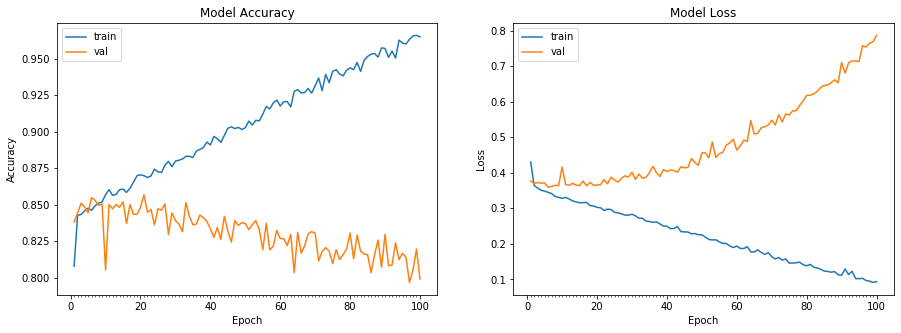

In [124]:
plot_model_history(historya)

# 7. Dropout (Regularization)

In [125]:
from keras.layers import Dropout

In [126]:
def mlp_model_d(x):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (x, )))
    model.add(Activation('selu'))    
    model.add(Dropout(0.25))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('selu'))
    model.add(Dropout(0.25))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dropout(0.25))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dropout(0.25))                         # Dropout layer after Activation
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [127]:
modeld = mlp_model_d(61)
historyd = modeld.fit(x1, y1, validation_split = 0.3, epochs = 100, verbose = 0)

In [128]:
results_d1 = modeld.evaluate(x1, y1)
print('Train accuracy: ', results_d1[1])
results_d2 = modeld.evaluate(x2, y2)
print('Test accuracy: ', results_d2[1])

7000/7000 [==============================] - 0s 45us/step
Train accuracy:  0.8342857360839844
3000/3000 [==============================] - 0s 45us/step
Test accuracy:  0.8376666903495789


In [129]:
y_pred_d = modeld.predict(x2)
y_pred_d = (y_pred_d > 0.5)
print(classification_report(y2, y_pred_d)) 
print("AUC",roc_auc_score(y2, y_pred_d))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      2382
         1.0       0.70      0.37      0.49       618

    accuracy                           0.84      3000
   macro avg       0.78      0.67      0.69      3000
weighted avg       0.82      0.84      0.82      3000

AUC 0.6653032859716483


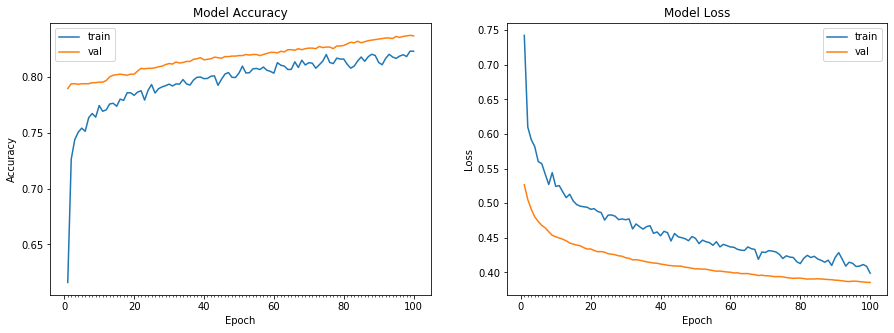

In [130]:
plot_model_history(historyd)

# 8. Ensemble method (Adam optimiser model)

In [131]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier

In [132]:
model1 = KerasClassifier(build_fn = mlp_model_a, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model_a, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model_a, epochs = 100, verbose = 0)
model4 = KerasClassifier(build_fn = mlp_model_a, epochs = 100, verbose = 0)
model5 = KerasClassifier(build_fn = mlp_model_a, epochs = 100, verbose = 0)
model6 = KerasClassifier(build_fn = mlp_model_a, epochs = 100, verbose = 0)
model7 = KerasClassifier(build_fn = mlp_model_a, epochs = 100, verbose = 0)
model8 = KerasClassifier(build_fn = mlp_model_a, epochs = 100, verbose = 0)

In [133]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), 
                                             ('model4', model4), ('model5', model5), ('model6', model6), 
                                             ('model7', model7), ('model8', model8)], voting = 'soft')

In [134]:
ensemble_clf.fit(x1, y1)

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002736A3E1588>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027367F50048>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002736A517148>),
                             ('model4',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000273...
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027367F47308>),
                             ('model6',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027367F47508>),
                             ('model7',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027364264488>),
                   

In [135]:
from sklearn.metrics import accuracy_score

In [138]:

y_pred_e = ensemble_clf.predict(x2)
train_acc1 = ensemble_clf.score(x1,y1)
print("Train set accuracy: {:.3f}".format(train_acc1))
print('Test accuracy:', accuracy_score(y_pred_e,y2))

Train set accuracy: 0.985
Test accuracy: 0.8396666666666667


In [140]:
y_pred_e = (y_pred_e > 0.5)
print(classification_report(y2, y_pred_e)) 
print("AUC",roc_auc_score(y2, y_pred_e))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      2382
         1.0       0.63      0.52      0.57       618

    accuracy                           0.84      3000
   macro avg       0.76      0.72      0.74      3000
weighted avg       0.83      0.84      0.83      3000

AUC 0.7228831935307688


# 9. Ensemble method ( Batch Normalization model)

In [141]:
model11 = KerasClassifier(build_fn = mlp_model_b, epochs = 50, verbose = 0)
model21 = KerasClassifier(build_fn = mlp_model_b, epochs = 50, verbose = 0)
model31 = KerasClassifier(build_fn = mlp_model_b, epochs = 50, verbose = 0)
model41 = KerasClassifier(build_fn = mlp_model_b, epochs = 50, verbose = 0)
model51 = KerasClassifier(build_fn = mlp_model_b, epochs = 50, verbose = 0)
model61 = KerasClassifier(build_fn = mlp_model_b, epochs = 50, verbose = 0)
model71 = KerasClassifier(build_fn = mlp_model_b, epochs = 50, verbose = 0)
model81 = KerasClassifier(build_fn = mlp_model_b, epochs = 50, verbose = 0)

In [142]:
ensemble_clf1 = VotingClassifier(estimators = [('model11', model11), ('model21', model21), ('model31', model31),
                                              ('model41', model41),('model51', model51), ('model61', model61),
                                        ('model71', model71),('model81', model81)], voting = 'soft')

In [143]:
ensemble_clf1.fit(x1, y1)

VotingClassifier(estimators=[('model11',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027372468D08>),
                             ('model21',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027372468CC8>),
                             ('model31',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027372468D48>),
                             ('model41',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000...
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027372468E88>),
                             ('model61',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027372468EC8>),
                             ('model71',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027372468F08>),
                 

In [144]:
y_pred_e1 = ensemble_clf1.predict(x2)
train_acc11 = ensemble_clf1.score(x1,y1)
print("Train set accuracy: {:.3f}".format(train_acc11))
print('Test accuracy:', accuracy_score(y_pred_e1,y2))

Train set accuracy: 0.857
Test accuracy: 0.8513333333333334


In [145]:
y_pred_e1 = (y_pred_e1 > 0.5)
print(classification_report(y2, y_pred_e1)) 
print("AUC",roc_auc_score(y2, y_pred_e1))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      2382
         1.0       0.73      0.45      0.55       618

    accuracy                           0.85      3000
   macro avg       0.80      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000

AUC 0.701470576247422


# KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# 10. Random value for k

In [147]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x1, y1)
train_acck1 = knn1.score(x1,y1)
print("Train set accuracy: {:.3f}".format(train_acck1))
y_pred_k1 = knn1.predict(x2)
metrics.accuracy_score(y2, y_pred_k1)

Train set accuracy: 0.848


0.8026666666666666

In [148]:
y_pred_k1 = (y_pred_k1 > 0.5)
print('Test accuracy:', accuracy_score(y_pred_k1,y2))
print(classification_report(y2, y_pred_k1)) 
print("AUC",roc_auc_score(y2, y_pred_k1))

Test accuracy: 0.8026666666666666
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88      2382
         1.0       0.55      0.23      0.32       618

    accuracy                           0.80      3000
   macro avg       0.69      0.59      0.60      3000
weighted avg       0.77      0.80      0.77      3000

AUC 0.5893391373814939


# 11. Finding the optimal value for "K"

In [149]:
# search for an optimal value of K for KNN

# range of k we want to try
neighbors = list(range(1, 31))
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in neighbors:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x1, y1, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.7500061227530201, 0.78928778455233, 0.7798639043869768, 0.7912882020458933, 0.7912888128343118, 0.7981467778505671, 0.7945771810613025, 0.7977177970917142, 0.7978592282841392, 0.8007163740567401, 0.8000026997139644, 0.7987167804715636, 0.7995767781450283, 0.8001451457772653, 0.8015745352833081, 0.8008592288672309, 0.8005749422812233, 0.8002869816352394, 0.8015739215794317, 0.7998590215781782, 0.8015718795927572, 0.8000012656002505, 0.7995726953378622, 0.7981426932941263, 0.8001426967926758, 0.7978575915461052, 0.7997157562712227, 0.7978577953366085, 0.7988577970858832, 0.7965718760942078]


In [150]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.8015745352833081


Text(0, 0.5, 'Cross-validated accuracy')

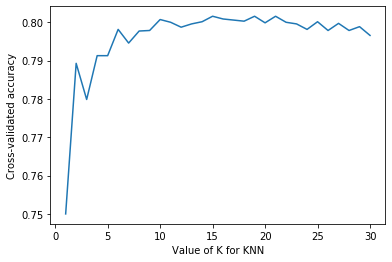

In [151]:
plt.plot(neighbors, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [152]:
knn2 = KNeighborsClassifier(n_neighbors=21)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn2, x1, y1, cv=10, scoring='accuracy').mean())

0.8015718795927572


In [153]:
knn2.fit(x1, y1)
train_acck2 = knn2.score(x1,y1)
print("Train set accuracy: {:.3f}".format(train_acck2))
y_pred_k11 = knn2.predict(x2)
y_pred_k11 = (y_pred_k11 > 0.5)
print('Test accuracy:', accuracy_score(y_pred_k11,y2))
print(classification_report(y2, y_pred_k11)) 
print("AUC",roc_auc_score(y2, y_pred_k11))

Train set accuracy: 0.812
Test accuracy: 0.814
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      2382
         1.0       0.82      0.12      0.22       618

    accuracy                           0.81      3000
   macro avg       0.82      0.56      0.56      3000
weighted avg       0.81      0.81      0.75      3000

AUC 0.5587293047369837


The optimal number of neighbors is 15


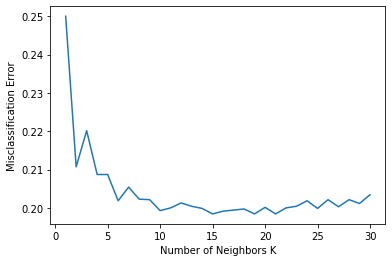

In [155]:
# changing to misclassification error
mse = [1 - x for x in k_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()


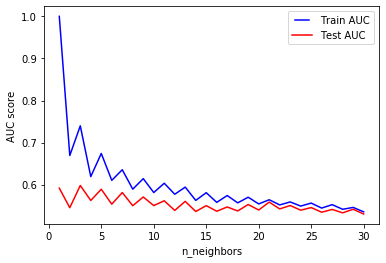

In [156]:
from sklearn.metrics import roc_curve, auc
neighbors = list(range(1,31))
train_results = []
test_results = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x1, y1)  
    train_pred = model.predict(x1)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(x2)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results,'b', label="Train AUC")
line2, = plt.plot(neighbors, test_results, 'r',label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

# 12. Changing the distance

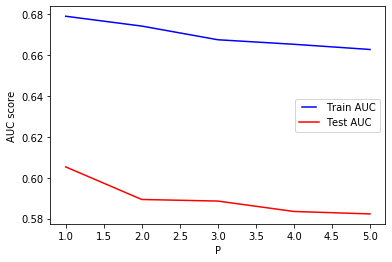

In [157]:
distances = [1, 2, 3, 4, 5]
train_results = []
test_results = []
for p in distances:
    model = KNeighborsClassifier(p=p)
    model.fit(x1, y1)  
    train_pred = model.predict(x1)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(x2)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(distances, train_results,'b', label="Train AUC")
line2, = plt.plot(distances, test_results, 'r',label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('P')
plt.show()

In [158]:
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)
weight_options = [ 'distance']

In [159]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [160]:
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid.fit(x1, y1)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [161]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8018571428571428
{'n_neighbors': 15, 'weights': 'distance'}


In [162]:
# instantiate model with best parameters
knn3 = KNeighborsClassifier(n_neighbors=16, weights='distance')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn3.fit(x1, y1)
train_acck3 = knn3.score(x1,y1)
print("Train set accuracy: {:.3f}".format(train_acck3))
y_pred_k111 = knn3.predict(x2)
y_pred_k111 = (y_pred_k111 > 0.5)
print('Test accuracy:', accuracy_score(y_pred_k111,y2))
print(classification_report(y2, y_pred_k111)) 
print("AUC",roc_auc_score(y2, y_pred_k111))

Train set accuracy: 1.000
Test accuracy: 0.8076666666666666
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      2382
         1.0       0.68      0.13      0.21       618

    accuracy                           0.81      3000
   macro avg       0.74      0.56      0.55      3000
weighted avg       0.78      0.81      0.75      3000

AUC 0.5559393672609295
